<a href="https://colab.research.google.com/github/Ayamoualem993/nlp-course-notebooks/blob/master/EDA_Olympic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [ ]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Courses - Workshops/Courses Content/Machine Learning beginners/Tests/Olympic Analysis/athlete_events.csv')
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


### drop duplicates first

In [ ]:
df = df.drop_duplicates()

### The missing data in each column

In [ ]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### Number of males and females

In [ ]:
df['Sex'].value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

### Number of cities

In [ ]:
df['City'].nunique(), df['City'].unique()

(42, array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
        'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
        'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
        'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
        'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
        'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
        'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
        'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
        'Garmisch-Partenkirchen'], dtype=object))

### the number of athlete for each year

In [ ]:
df.groupby(['Year'])['ID'].nunique()



```
# This is formatted as code
```

### The athlete who participated the most

In [ ]:
id = df['ID'].value_counts().idxmax()
name = df[df['ID'] == id]['Name'].unique()[0]
id, name

(106296, 'Heikki Ilmari Savolainen')

### the number of each medal for each year.
##### The output should look like this 
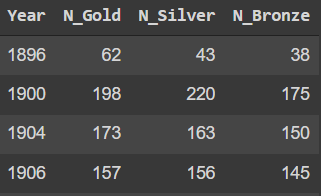

In [ ]:
n_medal = df.groupby(['Year'])['Medal'].value_counts().reset_index(name='N_Medal')
n_medal.head(1)

,Year,Medal,N_Medal
0,1896,Gold,62


In [ ]:
n_medal = df.groupby(['Year'])['Medal'].value_counts().reset_index(name='N_Medal')

# gold = dict(n_medal.groupby(['Medal']).get_group('Gold')[['Year', 'N_Medal']].values)
# silver = dict(n_medal.groupby(['Medal']).get_group('Silver')[['Year', 'N_Medal']].values)
# bronze = dict(n_medal.groupby(['Medal']).get_group('Bronze')[['Year', 'N_Medal']].values)

# n_medal['N_Gold'] = n_medal['Year'].map(gold)
# n_medal['N_Silver'] = n_medal['Year'].map(silver)
# n_medal['N_Bronze'] = n_medal['Year'].map(bronze)

# n_medal = n_medal.drop(['N_Medal', 'Medal'], axis=1).drop_duplicates()
# n_medal.head(4)

import numpy as np
pd.pivot_table(n_medal, values='N_Medal', index=['Year'], columns=['Medal'], aggfunc=np.sum).head()

###  the number of winners with the gold medal in each city

In [ ]:
n_gold = df[df['Medal'] == 'Gold'].groupby(['City'])['ID'].count().sort_values(ascending=True)
n_gold

City
Garmisch-Partenkirchen      36
Oslo                        45
Squaw Valley                50
Cortina d'Ampezzo           51
Chamonix                    55
Grenoble                    66
Sapporo                     70
Sankt Moritz                71
Sarajevo                    74
Calgary                     87
Albertville                104
Lake Placid                104
Lillehammer                110
Innsbruck                  131
Nagano                     145
Salt Lake City             162
St. Louis                  173
Vancouver                  174
Torino                     176
Sochi                      202
Amsterdam                  245
Melbourne                  290
Helsinki                   306
Roma                       309
Berlin                     312
Stockholm                  338
Tokyo                      347
Mexico City                359
Munich                     404
Montreal                   438
Moskva                     457
Paris                      475
Ant

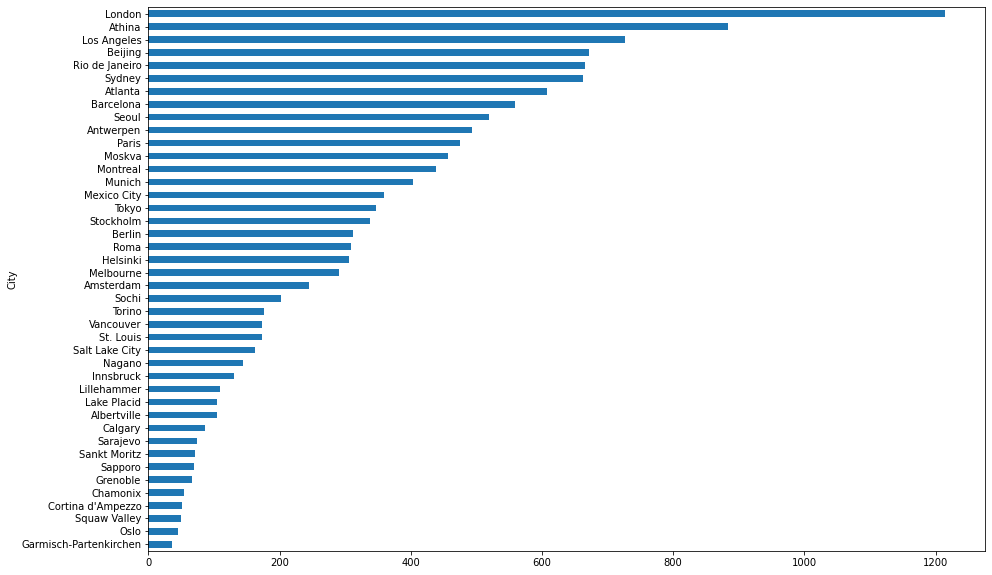

In [ ]:
plt.figure(figsize=(15,10))
n_gold.plot(kind='barh');

### the total missing data for each year

In [ ]:
df['n_miss'] = df.isnull().sum(1)
year_most_missing = df.groupby(['Year'])['n_miss'].sum().sort_values(ascending=True)
year_most_missing

Year
1896     1065
1994     3207
1904     3331
1998     3337
2002     3707
2006     3878
2010     3908
2014     4532
1906     5022
1900     5676
1932     6308
1908     8057
1980     8706
1968     9663
1964     9710
1912    10018
1960    10407
1976    10819
1920    11175
1984    11307
1972    11331
2012    11507
2004    11515
2008    11866
2016    12064
2000    12067
1956    13531
1928    14124
1988    14802
1924    15194
1996    15638
1936    18433
1948    20008
1992    20759
1952    22943
Name: n_miss, dtype: int64

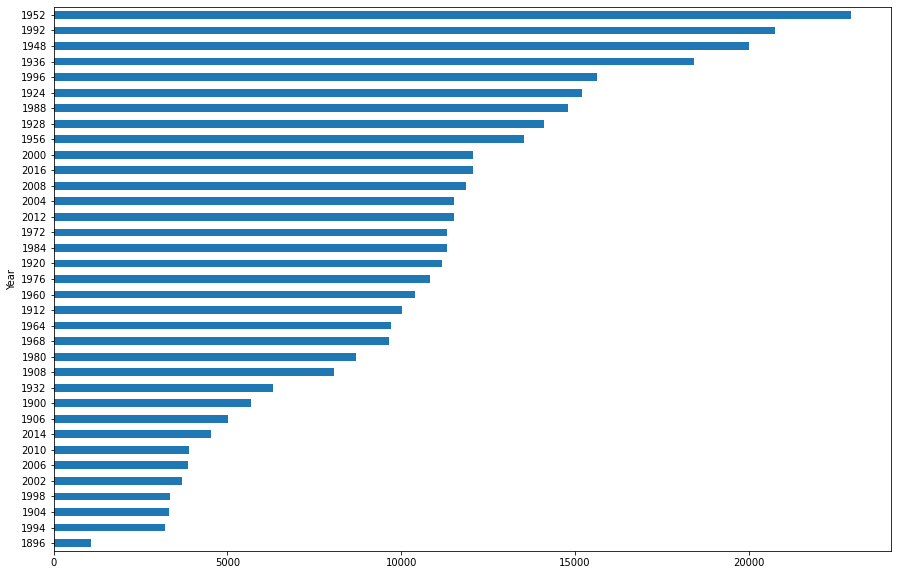

In [ ]:
plt.figure(figsize=(15,10))
year_most_missing.plot(kind='barh');

### the number of athletes changed over time for Summer and Winter

In [ ]:
n_athletes_over_years = df.groupby(['Year', 'Season'])['ID'].nunique().sort_index(ascending=False)
n_athletes_over_years

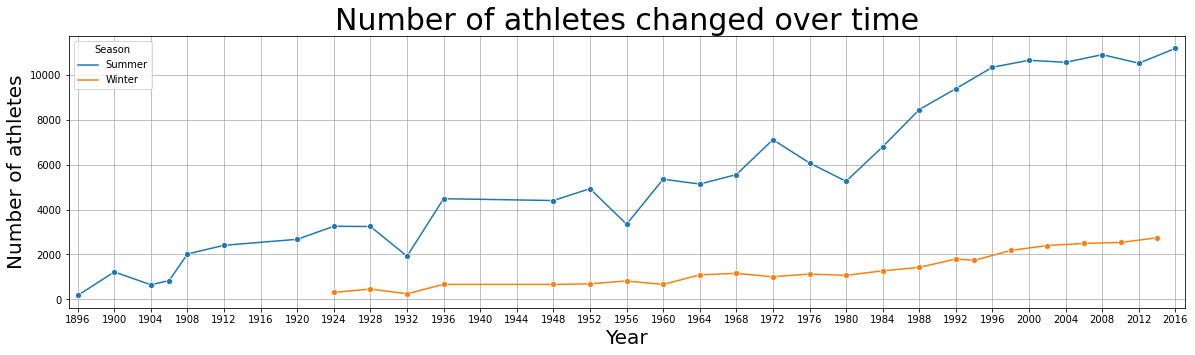

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x=n_athletes_over_years.index.get_level_values('Year'), y=n_athletes_over_years.values, hue=n_athletes_over_years.index.get_level_values('Season'), marker='o')
plt.xlabel('Year', size=20)
plt.ylabel('Number of athletes', size=20)
plt.title('Number of athletes changed over time', size=30)
plt.xticks(list(range(1896, 2020))[::4])
plt.xlim(1895,2017)
plt.grid();